# Machine Learning

## Linear Regression

In [1]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------ --------------------- 3.9/8.7 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 24.6 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/38.5 MB 23.7 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/38.5 MB 19.4 MB/s eta 0:00:02
   ----------- ---------------------------- 11.0/38.5 MB 17.5 MB/s eta 0:00:02
   ---------------- ----------------------- 16.3/38.5 MB 19.2 MB/s eta 0:00:02
   -------------------- ------------------- 19.4/38.5 MB 18.6 MB/s eta 0:00:02
   ---------------------------- ----------- 27.3/38.5 MB 21.6 MB/s eta 0:00:01
   ----------------------------- ---------- 28.3/38.5 MB 20.1 MB/s eta 0:00:01
   -------------------------------------- - 37.5/38.5 MB 22.3 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 21.0 MB/s  0:00:01

   

In [2]:
pip install matplotlib

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

In [31]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Student_Performance.csv')

In [23]:
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [22]:
df=df.rename(columns={"Hours Studied": "Hours_Studied", "Previous Scores": "Previous_Scores", "Extracurricular Activities": "Extracurricular_Activities", "Sample Question Papers Practiced": "Sample_Question_Papers_Practiced", "Sleep Hours": "Sleep_Hours", "Performance Index": "Performance_Index"})

In [8]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [15]:
df.duplicated()
df=df.drop_duplicates()

In [16]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.shape

(9873, 6)

In [26]:
from sklearn.preprocessing import LabelEncoder
ls=LabelEncoder()
df.Extracurricular_Activities = ls.fit_transform(df.Extracurricular_Activities)

In [28]:
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


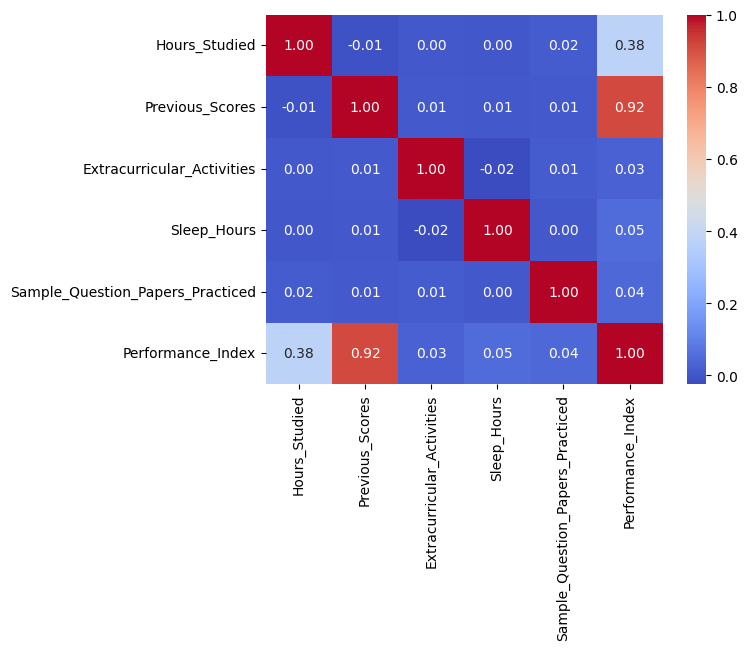

In [33]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.show()

In [59]:
x=df['Previous_Scores']
y=df['Performance_Index']

In [35]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(x_train.values.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
y_pred = lr.predict(x_test.values.reshape(-1,1))

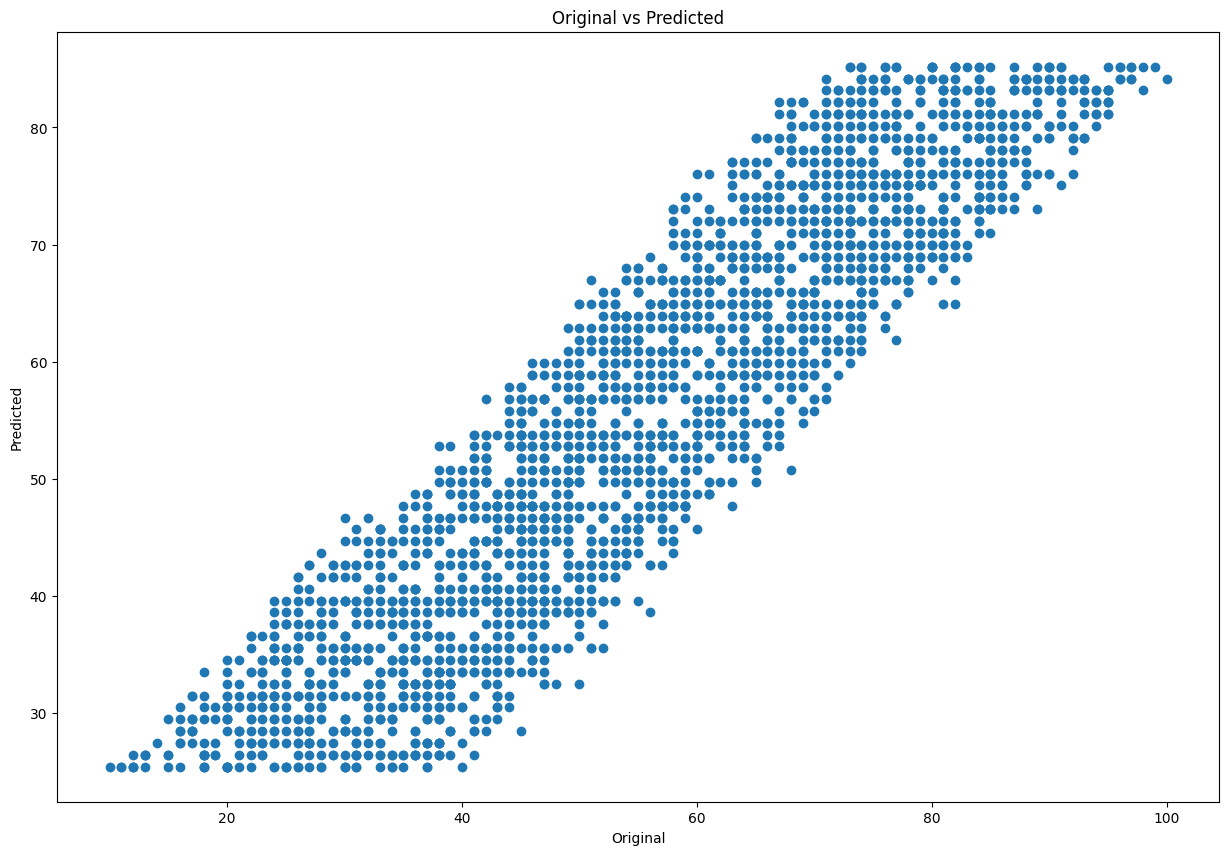

In [65]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs Predicted')
plt.show()